In [ ]:
# mount Google Drive
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/DS5230_Project/

In [61]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster import hierarchy
import pickle

In [2]:
m4 = pd.read_csv("model4.csv")
m4

,Cluster,DISTRICT,MONTH,DAY_OF_WEEK,HOUR,Median Age,White Alone,Black / African American,Hispanic,Asian Alone,...,PROSTITUTION,RESTRAINING ORDER VIOLATIONS,ROBBERY,SEARCH WARRANTS,SERVICE,TOWED,VANDALISM,VERBAL DISPUTES,VIOLATIONS,WARRANT ARRESTS
0,0,A1,7.033408,4.034134,12.513945,32.986141,0.700316,0.029173,0.067944,0.175212,...,0.207862,0.438652,3.255942,0.261958,0.079964,7.239948,7.067827,1.594640,1.818416,6.784553
1,1,A15,6.990224,3.826041,13.093500,34.900000,0.719667,0.063833,0.113500,0.080333,...,0.000000,0.354359,0.944578,0.253053,0.166541,4.608553,5.037885,2.570483,1.191922,1.192759
2,2,A7,6.967226,3.962442,13.076501,32.866667,0.333833,0.026833,0.560500,0.041167,...,0.003705,0.332539,1.238325,0.122911,0.137881,3.329743,4.537581,2.676015,1.435600,1.296317
3,4,B2,6.929485,3.913553,13.237799,30.097267,0.224368,0.389967,0.263748,0.079663,...,0.100164,0.805532,2.378504,0.702133,0.145011,3.417453,8.010383,9.089829,4.043674,3.692102
4,3,B3,6.984170,3.949746,13.275074,37.066667,0.064500,0.723833,0.157167,0.019500,...,0.019438,2.360219,4.850677,1.769451,0.396645,7.647783,19.247567,26.807097,8.484071,4.878210
5,2,C11,6.954368,3.935199,13.067816,33.133333,0.219833,0.430833,0.185167,0.101000,...,0.089078,0.536698,1.259134,0.223159,0.098609,2.583718,4.759928,4.975176,1.687260,1.881792
6,4,C6,6.992721,3.969458,12.768413,32.153269,0.773607,0.052529,0.099930,0.052459,...,0.078554,0.373794,1.591727,0.248840,0.139623,8.755471,7.343611,3.470135,1.363744,3.342219
7,2,D14,7.051409,3.976169,12.820425,28.934509,0.620495,0.046337,0.117377,0.174762,...,0.109310,0.197901,0.561975,0.194145,0.093932,5.144274,3.598129,1.760091,0.917704,0.656967
8,0,D4,7.006984,3.955507,12.983868,30.529933,0.607478,0.073335,0.115707,0.167306,...,0.046381,0.317460,1.705076,0.094601,0.079262,5.649420,5.130293,2.166338,1.369631,2.904208
9,1,E13,6.970813,3.879755,13.350468,34.100000,0.547167,0.119000,0.235500,0.058333,...,0.004254,0.306405,1.441597,0.318479,0.119816,5.239595,4.924821,3.472188,2.498392,2.159070


In [91]:
year = pd.read_csv("model_data_yearly2.csv")
year

,DISTRICT,YEAR,MONTH,DAY_OF_WEEK,HOUR,Median Age,White Alone,Black / African American,Hispanic,Asian Alone,...,PROSTITUTION,RESTRAINING ORDER VIOLATIONS,ROBBERY,SEARCH WARRANTS,SERVICE,TOWED,VANDALISM,VERBAL DISPUTES,VIOLATIONS,WARRANT ARRESTS
0,A1,2015,9.185894,3.997758,12.467150,32.661270,0.714909,0.027158,0.060292,0.172636,...,0.169656,0.266602,2.593311,0.387785,0.048473,4.726127,5.307804,0.557441,1.623849,5.307804
1,A1,2016,6.546044,4.044214,12.437755,32.115835,0.712439,0.026454,0.060894,0.176923,...,0.309082,0.689491,3.851641,0.261531,0.047551,8.773181,8.464099,1.307656,1.688065,11.222064
2,A1,2017,6.707128,4.110092,12.365662,32.266154,0.703850,0.028123,0.072998,0.172592,...,0.724705,0.841593,4.161212,0.397419,0.116888,9.351038,7.457453,2.010473,1.098747,12.647279
3,A1,2018,6.546260,4.057284,12.550072,33.435971,0.691667,0.029577,0.076794,0.173991,...,0.000000,0.689719,3.678499,0.252897,0.091962,8.345595,7.816811,1.517381,1.471400,7.586905
4,A1,2019,6.734545,4.036364,12.659144,33.560941,0.701228,0.031321,0.072256,0.167790,...,0.023083,0.000000,3.000785,0.230830,0.092332,6.855639,6.486312,2.585292,2.262130,3.323946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,E5,2016,6.491969,3.895478,13.119842,40.122308,0.621829,0.149984,0.157372,0.045059,...,0.000000,0.258102,0.467810,0.290365,0.129051,1.064671,3.823136,2.435837,1.177590,0.854963
68,E5,2017,6.678527,3.988474,13.039840,41.149645,0.610271,0.150721,0.161674,0.050095,...,0.000000,0.174227,0.475165,0.285099,0.110872,1.251267,2.993538,2.787633,0.807780,0.807780
69,E5,2018,6.398635,3.883215,12.967897,41.146840,0.599071,0.154430,0.164810,0.052446,...,0.015661,0.219257,0.438514,0.187935,0.046984,2.239554,2.537117,2.959970,0.610787,0.673432
70,E5,2019,6.617439,3.888828,13.349319,41.382734,0.596050,0.155542,0.166194,0.051379,...,0.000000,0.000000,0.409146,0.157364,0.078682,1.274647,2.218830,2.753867,0.834028,0.094418


In [100]:
y15 = year[year['YEAR'] == 2015]
y16 = year[year['YEAR'] == 2016]
y17 = year[year['YEAR'] == 2017]
y18 = year[year['YEAR'] == 2018]
y19 = year[year['YEAR'] == 2019]
y20 = year[year['YEAR'] == 2020]
y15

,DISTRICT,YEAR,MONTH,DAY_OF_WEEK,HOUR,Median Age,White Alone,Black / African American,Hispanic,Asian Alone,...,PROSTITUTION,RESTRAINING ORDER VIOLATIONS,ROBBERY,SEARCH WARRANTS,SERVICE,TOWED,VANDALISM,VERBAL DISPUTES,VIOLATIONS,WARRANT ARRESTS
0,A1,2015,9.185894,3.997758,12.467150,32.661270,0.714909,0.027158,0.060292,0.172636,...,0.169656,0.266602,2.593311,0.387785,0.048473,4.726127,5.307804,0.557441,1.623849,5.307804
6,A15,2015,9.147264,3.894527,13.091542,34.000000,0.696000,0.086000,0.110000,0.087000,...,0.000000,0.110754,0.941411,0.000000,0.166131,2.491970,4.319415,0.941411,0.886034,0.664525
12,A7,2015,9.148837,3.966173,12.980550,34.000000,0.320000,0.024000,0.579000,0.036000,...,0.022228,0.244504,1.178066,0.244504,0.111138,1.822668,2.778457,1.778212,1.978261,1.266976
18,B2,2015,9.166788,3.927863,13.217018,30.056774,0.233795,0.412733,0.250983,0.068226,...,0.000000,0.573888,2.104256,0.464576,0.081984,1.516704,6.340097,5.151329,3.497985,2.855776
24,B3,2015,9.210275,3.899633,13.286055,38.000000,0.061000,0.737000,0.159000,0.023000,...,0.000000,1.936707,4.821164,1.648261,0.412065,1.524642,14.628317,13.392121,6.840284,5.150816
30,C11,2015,9.176853,3.911715,13.157470,33.000000,0.221000,0.441000,0.163000,0.106000,...,0.176722,0.449839,1.172794,0.152624,0.096394,1.237057,3.253299,2.570508,2.024275,1.751159
36,C6,2015,9.122927,3.825217,12.648592,32.148590,0.781829,0.049251,0.097868,0.049309,...,0.259592,0.337469,1.090286,0.051918,0.077878,5.088002,5.425471,1.453715,1.272000,2.206531
42,D14,2015,9.165269,3.937248,12.691208,29.829481,0.640908,0.045975,0.120680,0.157389,...,0.000000,0.177701,0.725614,0.088851,0.059234,3.124584,2.162034,0.725614,0.755231,0.533104
48,D4,2015,9.200431,3.932089,13.155348,29.818966,0.621933,0.075539,0.116588,0.157337,...,0.024574,0.294884,1.302403,0.073721,0.049147,4.202094,3.636900,1.228682,0.970659,2.125620
54,E13,2015,9.263275,3.875232,13.168585,33.000000,0.543000,0.116000,0.254000,0.055000,...,0.000000,0.127421,1.070336,0.254842,0.050968,2.471967,3.058104,1.146789,2.038736,1.427115


In [101]:
# drop district (non-numerical) and year (no longer necessary)
y15 = y15.drop(['DISTRICT', 'YEAR'], axis = 1)
y16 = y16.drop(['DISTRICT', 'YEAR'], axis = 1)
y17 = y17.drop(['DISTRICT', 'YEAR'], axis = 1)
y18 = y18.drop(['DISTRICT', 'YEAR'], axis = 1)
y19 = y19.drop(['DISTRICT', 'YEAR'], axis = 1)
y20 = y20.drop(['DISTRICT', 'YEAR'], axis = 1)

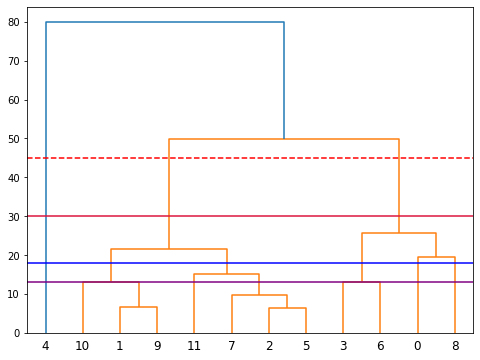

In [127]:
c15 = hierarchy.linkage(y15, method="ward")

plt.figure(figsize=(8, 6))
d15 = hierarchy.dendrogram(clusters)
# Plotting a horizontal line based on the first biggest distance between clusters 
plt.axhline(45, color='red', linestyle='--'); 
# Plotting a horizontal line based on the second biggest distance between clusters 
plt.axhline(30, color='crimson');
# Plotting a horizontal line based on the third biggest distance between clusters 
plt.axhline(18, color='blue');
# Plotting a horizontal line based on the fourth biggest distance between clusters 
plt.axhline(13, color='purple');

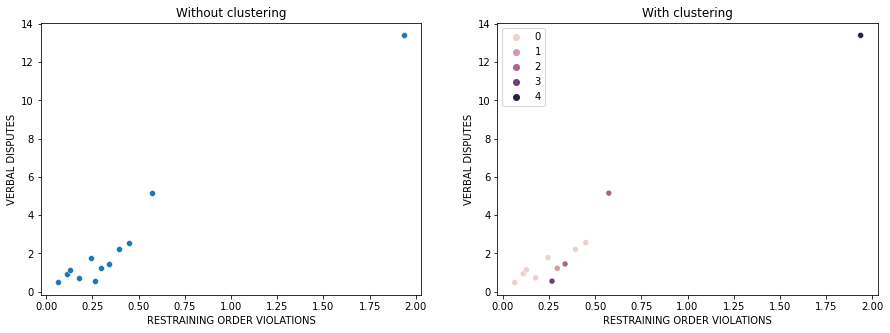

In [128]:
cm15 = AgglomerativeClustering(n_clusters=5, linkage="ward")
cm15.fit(y15)
labels = cm15.labels_

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=y15, x='RESTRAINING ORDER VIOLATIONS', y='VERBAL DISPUTES').set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=y15, x='RESTRAINING ORDER VIOLATIONS', y='VERBAL DISPUTES', 
                hue=cm15.labels_).set_title('With clustering');

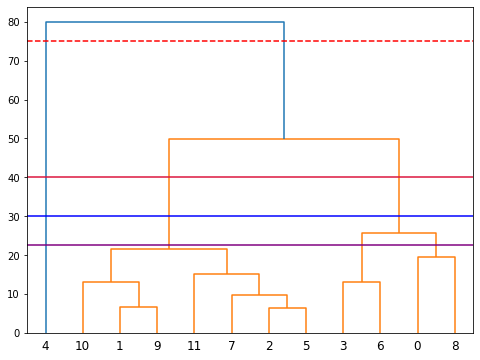

In [129]:
c16 = hierarchy.linkage(y16, method="ward")

plt.figure(figsize=(8, 6))
d16 = hierarchy.dendrogram(clusters)
# Plotting a horizontal line based on the first biggest distance between clusters 
plt.axhline(75, color='red', linestyle='--'); 
# Plotting a horizontal line based on the second biggest distance between clusters 
plt.axhline(40, color='crimson');
# Plotting a horizontal line based on the third biggest distance between clusters 
plt.axhline(30, color='blue');
# Plotting a horizontal line based on the fourth biggest distance between clusters 
plt.axhline(22.5, color='purple');

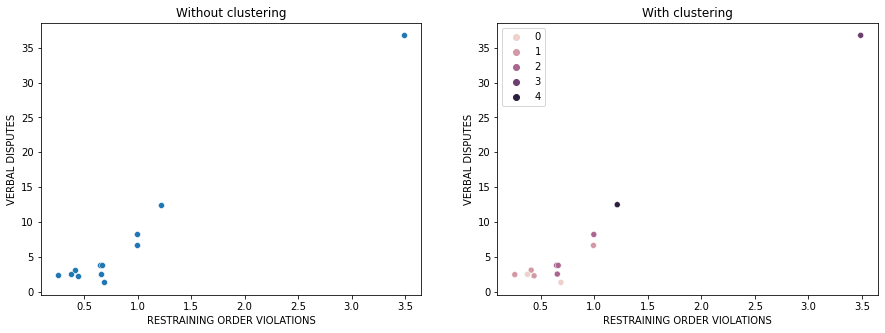

In [130]:
cm16 = AgglomerativeClustering(n_clusters=5, linkage="ward")
cm16.fit(y16)
labels = cm16.labels_

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=y16, x='RESTRAINING ORDER VIOLATIONS', y='VERBAL DISPUTES').set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=y16, x='RESTRAINING ORDER VIOLATIONS', y='VERBAL DISPUTES', 
                hue=cm16.labels_).set_title('With clustering');

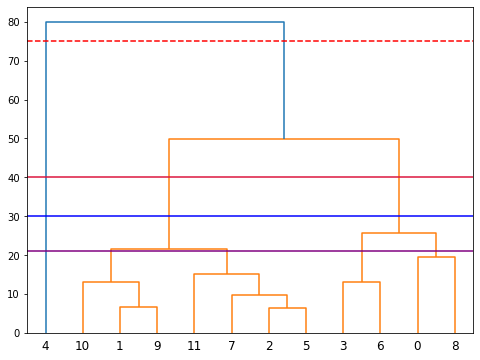

In [131]:
c17 = hierarchy.linkage(y17, method="ward")

plt.figure(figsize=(8, 6))
d17 = hierarchy.dendrogram(clusters)
# Plotting a horizontal line based on the first biggest distance between clusters 
plt.axhline(75, color='red', linestyle='--'); 
# Plotting a horizontal line based on the second biggest distance between clusters 
plt.axhline(40, color='crimson');
# Plotting a horizontal line based on the third biggest distance between clusters 
plt.axhline(30, color='blue');
# Plotting a horizontal line based on the fourth biggest distance between clusters 
plt.axhline(21, color='purple');

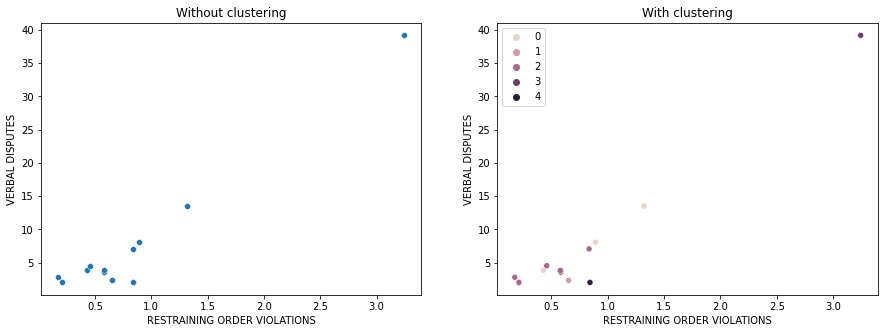

In [132]:
cm17 = AgglomerativeClustering(n_clusters=5, linkage="ward")
cm17.fit(y17)
labels = cm17.labels_

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=y17, x='RESTRAINING ORDER VIOLATIONS', y='VERBAL DISPUTES').set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=y17, x='RESTRAINING ORDER VIOLATIONS', y='VERBAL DISPUTES', 
                hue=cm17.labels_).set_title('With clustering');

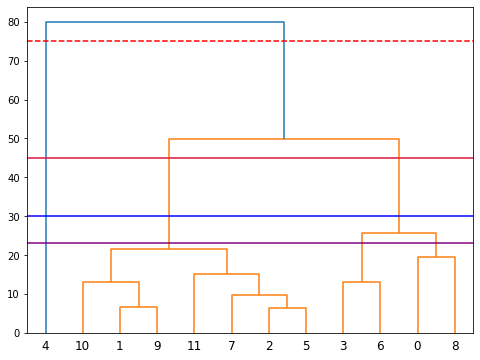

In [133]:
c18 = hierarchy.linkage(y18, method="ward")

plt.figure(figsize=(8, 6))
d18 = hierarchy.dendrogram(clusters)
# Plotting a horizontal line based on the first biggest distance between clusters 
plt.axhline(75, color='red', linestyle='--'); 
# Plotting a horizontal line based on the second biggest distance between clusters 
plt.axhline(45, color='crimson');
# Plotting a horizontal line based on the third biggest distance between clusters 
plt.axhline(30, color='blue');
# Plotting a horizontal line based on the fourth biggest distance between clusters 
plt.axhline(23, color='purple');

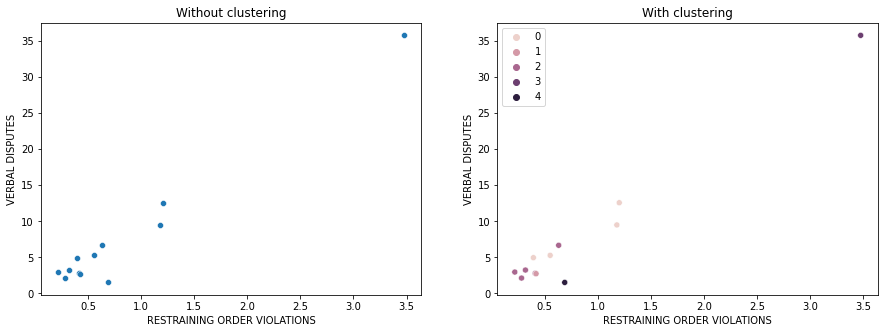

In [134]:
cm18 = AgglomerativeClustering(n_clusters=5, linkage="ward")
cm18.fit(y18)
labels = cm18.labels_

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=y18, x='RESTRAINING ORDER VIOLATIONS', y='VERBAL DISPUTES').set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=y18, x='RESTRAINING ORDER VIOLATIONS', y='VERBAL DISPUTES', 
                hue=cm18.labels_).set_title('With clustering');

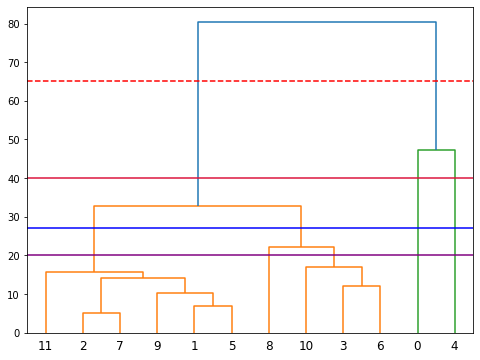

In [94]:
c19 = hierarchy.linkage(y19, method="ward")

plt.figure(figsize=(8, 6))
d19 = hierarchy.dendrogram(clusters)
# Plotting a horizontal line based on the first biggest distance between clusters 
plt.axhline(65, color='red', linestyle='--'); 
# Plotting a horizontal line based on the second biggest distance between clusters 
plt.axhline(40, color='crimson');
# Plotting a horizontal line based on the third biggest distance between clusters 
plt.axhline(27, color='blue');
# Plotting a horizontal line based on the fourth biggest distance between clusters 
plt.axhline(20, color='purple');

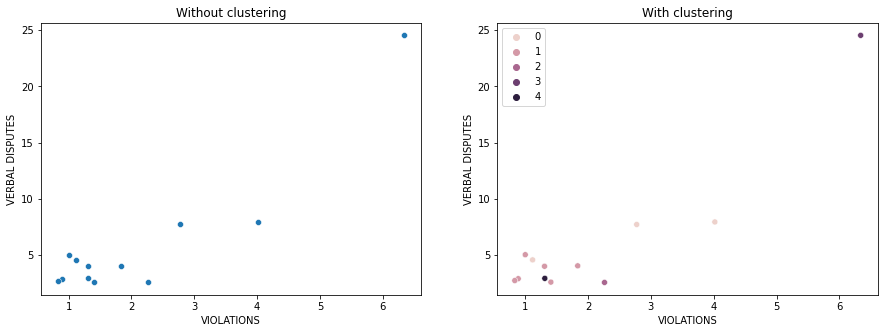

In [135]:
cm19 = AgglomerativeClustering(n_clusters=5, linkage="ward")
cm19.fit(y19)
labels = cm19.labels_

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=y19, x='VIOLATIONS', y='VERBAL DISPUTES').set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=y19, x='VIOLATIONS', y='VERBAL DISPUTES', 
                hue=cm19.labels_).set_title('With clustering');

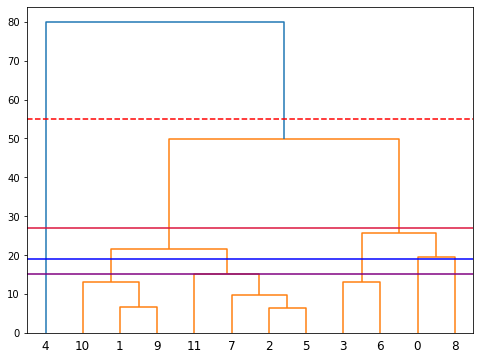

In [136]:
c20 = hierarchy.linkage(y20, method="ward")

plt.figure(figsize=(8, 6))
d20 = hierarchy.dendrogram(clusters)
# Plotting a horizontal line based on the first biggest distance between clusters 
plt.axhline(55, color='red', linestyle='--'); 
# Plotting a horizontal line based on the second biggest distance between clusters 
plt.axhline(27, color='crimson');
# Plotting a horizontal line based on the third biggest distance between clusters 
plt.axhline(19, color='blue');
# Plotting a horizontal line based on the fourth biggest distance between clusters 
plt.axhline(15, color='purple');

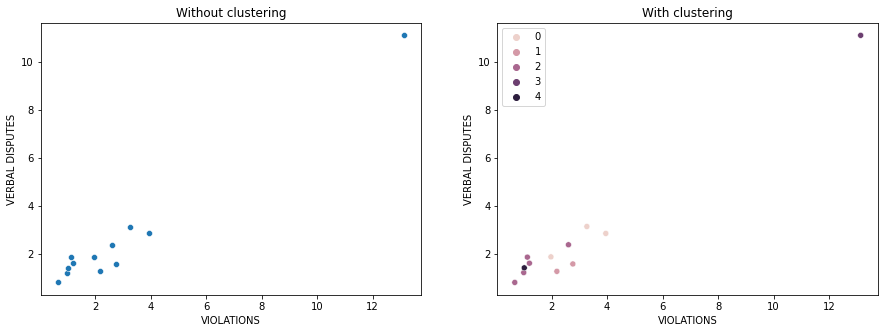

In [138]:
cm20 = AgglomerativeClustering(n_clusters=5, linkage="ward")
cm20.fit(y20)
labels = cm20.labels_

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=y20, x='VIOLATIONS', y='VERBAL DISPUTES').set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=y20, x='VIOLATIONS', y='VERBAL DISPUTES', 
                hue=cm20.labels_).set_title('With clustering');

In [122]:
ndf = pd.read_csv('model3.csv')

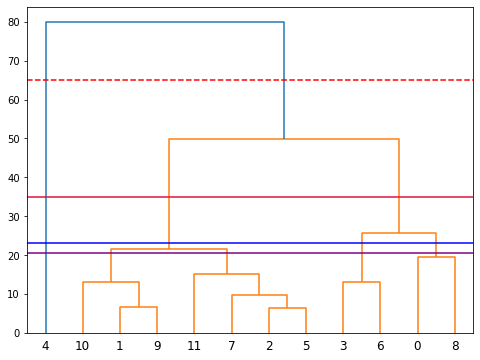

In [139]:
c0 = hierarchy.linkage(ndf, method="ward")

plt.figure(figsize=(8, 6))
d0 = hierarchy.dendrogram(clusters)
# Plotting a horizontal line based on the first biggest distance between clusters 
plt.axhline(65, color='red', linestyle='--'); 
# Plotting a horizontal line based on the second biggest distance between clusters 
plt.axhline(35, color='crimson');
# Plotting a horizontal line based on the second biggest distance between clusters 
plt.axhline(23, color='blue');
# Plotting a horizontal line based on the second biggest distance between clusters 
plt.axhline(20.5, color='purple');

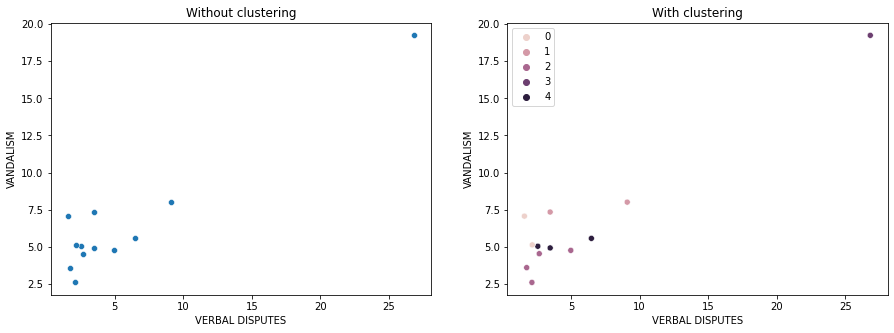

In [140]:
cm0 = AgglomerativeClustering(n_clusters=5, linkage="ward")
cm0.fit(ndf)
labels = cm0.labels_

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=ndf, x='VERBAL DISPUTES', y='VANDALISM').set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=ndf, x='VERBAL DISPUTES', y='VANDALISM', 
                hue=cm0.labels_).set_title('With clustering');

Silhouette scores

In [144]:
s0 = silhouette_score(ndf, cm0.labels_)
s15 = silhouette_score(y15, cm15.labels_)
s16 = silhouette_score(y15, cm16.labels_)
s17 = silhouette_score(y15, cm17.labels_)
s18 = silhouette_score(y15, cm18.labels_)
s19 = silhouette_score(y15, cm19.labels_)
s20 = silhouette_score(y15, cm20.labels_)


In [145]:
print("Overall:", s0)
print("2015:", s15)
print("2016:", s16)
print("2017:", s17)
print("2018:", s18)
print("2019:", s19)
print("2020:", s20)

Overall: 0.20358590074355054
2015: 0.3170016546413647
2016: 0.08339517731931612
2017: 0.21536861561148568
2018: 0.16556776645085217
2019: 0.21536861561148568
2020: 0.18613010614264233


In [162]:
df = pd.read_csv('model_data2.csv')
districts = pd.DataFrame(df['DISTRICT'])

In [147]:
clusters15 = pd.DataFrame(cm15.labels_)
clusters16 = pd.DataFrame(cm16.labels_)
clusters17 = pd.DataFrame(cm17.labels_)
clusters18 = pd.DataFrame(cm18.labels_)
clusters19 = pd.DataFrame(cm19.labels_)
clusters20 = pd.DataFrame(cm20.labels_)
clusters_all = pd.DataFrame(cm0.labels_)

In [167]:
results = districts
results['Neighborhoods'] = ['Downtown areas', 'Charlestown', 'East Boston', 'Roxbury/Longwood/Mission Hill', 
                                    'Mattapan', 'Dorchester', 'South Boston', 'Allston/Brighton', 
                                    'South End/Back Bay/Fenway', 'Jamaica Plain', 'Hyde Park', 
                            'West Roxbury/Roslindale']

results['2015'] = clusters15
results['2016'] = clusters16
results['2017'] = clusters17
results['2018'] = clusters18
results['2019'] = clusters19
results['2020'] = clusters20
results['Overall'] = clusters_all

In [168]:
results

,DISTRICT,Neighborhoods,2015,2016,2017,2018,2019,2020,Overall
0,A1,Downtown areas,3,0,4,4,2,1,0
1,A15,Charlestown,0,2,2,2,1,2,4
2,A7,East Boston,0,1,2,2,1,2,2
3,B2,Roxbury/Longwood/Mission Hill,2,4,0,0,0,0,1
4,B3,Mattapan,4,3,3,3,3,3,3
5,C11,Dorchester,0,1,2,2,1,2,2
6,C6,South Boston,2,2,0,0,0,0,1
7,D14,Allston/Brighton,0,1,2,2,1,2,2
8,D4,South End/Back Bay/Fenway,1,0,1,1,4,1,0
9,E13,Jamaica Plain,0,2,2,0,1,2,4


In [172]:
data = df.drop(['White Alone', 'Black / African American', 'Hispanic', 'Asian Alone', 
                         'Other Races', 'High School Graduate', 'Some College'], axis = 1)

In [173]:
data

,DISTRICT,MONTH,DAY_OF_WEEK,HOUR,Median Age,Less than High School,Bachelor's Degree or more,Poverty rate,AIRCRAFT,ARSON,...,PROSTITUTION,RESTRAINING ORDER VIOLATIONS,ROBBERY,SEARCH WARRANTS,SERVICE,TOWED,VANDALISM,VERBAL DISPUTES,VIOLATIONS,WARRANT ARRESTS
0,A1,7.033408,4.034134,12.513945,32.986141,0.094995,0.736119,0.153507,0.006881,0.052394,...,0.207862,0.438652,3.255942,0.261958,0.079964,7.239948,7.067827,1.594640,1.818416,6.784553
1,A15,6.990224,3.826041,13.093500,34.900000,0.088483,0.649333,0.171833,0.000000,0.035865,...,0.000000,0.354359,0.944578,0.253053,0.166541,4.608553,5.037885,2.570483,1.191922,1.192759
2,A7,6.967226,3.962442,13.076501,32.866667,0.297417,0.251333,0.185000,0.220112,0.018161,...,0.003705,0.332539,1.238325,0.122911,0.137881,3.329743,4.537581,2.676015,1.435600,1.296317
3,B2,6.929485,3.913553,13.237799,30.097267,0.206361,0.319703,0.348782,0.008671,0.074677,...,0.100164,0.805532,2.378504,0.702133,0.145011,3.417453,8.010383,9.089829,4.043674,3.692102
4,B3,6.984170,3.949746,13.275074,37.066667,0.173133,0.183667,0.203000,0.000000,0.111243,...,0.019438,2.360219,4.850677,1.769451,0.396645,7.647783,19.247567,26.807097,8.484071,4.878210
5,C11,6.954368,3.935199,13.067816,33.133333,0.190950,0.271667,0.227667,0.000000,0.015923,...,0.089078,0.536698,1.259134,0.223159,0.098609,2.583718,4.759928,4.975176,1.687260,1.881792
6,C6,6.992721,3.969458,12.768413,32.153269,0.079406,0.642607,0.145167,0.000000,0.028997,...,0.078554,0.373794,1.591727,0.248840,0.139623,8.755471,7.343611,3.470135,1.363744,3.342219
7,D14,7.051409,3.976169,12.820425,28.934509,0.076610,0.673646,0.225806,0.000000,0.018281,...,0.109310,0.197901,0.561975,0.194145,0.093932,5.144274,3.598129,1.760091,0.917704,0.656967
8,D4,7.006984,3.955507,12.983868,30.529933,0.074968,0.729393,0.264864,0.004036,0.033832,...,0.046381,0.317460,1.705076,0.094601,0.079262,5.649420,5.130293,2.166338,1.369631,2.904208
9,E13,6.970813,3.879755,13.350468,34.100000,0.079483,0.645500,0.150833,0.000000,0.025313,...,0.004254,0.306405,1.441597,0.318479,0.119816,5.239595,4.924821,3.472188,2.498392,2.159070


In [174]:
data_results = pd.merge(data, results[['DISTRICT', 'Overall']], on = 'DISTRICT')

In [175]:
data_results

,DISTRICT,MONTH,DAY_OF_WEEK,HOUR,Median Age,Less than High School,Bachelor's Degree or more,Poverty rate,AIRCRAFT,ARSON,...,RESTRAINING ORDER VIOLATIONS,ROBBERY,SEARCH WARRANTS,SERVICE,TOWED,VANDALISM,VERBAL DISPUTES,VIOLATIONS,WARRANT ARRESTS,Overall
0,A1,7.033408,4.034134,12.513945,32.986141,0.094995,0.736119,0.153507,0.006881,0.052394,...,0.438652,3.255942,0.261958,0.079964,7.239948,7.067827,1.594640,1.818416,6.784553,0
1,A15,6.990224,3.826041,13.093500,34.900000,0.088483,0.649333,0.171833,0.000000,0.035865,...,0.354359,0.944578,0.253053,0.166541,4.608553,5.037885,2.570483,1.191922,1.192759,4
2,A7,6.967226,3.962442,13.076501,32.866667,0.297417,0.251333,0.185000,0.220112,0.018161,...,0.332539,1.238325,0.122911,0.137881,3.329743,4.537581,2.676015,1.435600,1.296317,2
3,B2,6.929485,3.913553,13.237799,30.097267,0.206361,0.319703,0.348782,0.008671,0.074677,...,0.805532,2.378504,0.702133,0.145011,3.417453,8.010383,9.089829,4.043674,3.692102,1
4,B3,6.984170,3.949746,13.275074,37.066667,0.173133,0.183667,0.203000,0.000000,0.111243,...,2.360219,4.850677,1.769451,0.396645,7.647783,19.247567,26.807097,8.484071,4.878210,3
5,C11,6.954368,3.935199,13.067816,33.133333,0.190950,0.271667,0.227667,0.000000,0.015923,...,0.536698,1.259134,0.223159,0.098609,2.583718,4.759928,4.975176,1.687260,1.881792,2
6,C6,6.992721,3.969458,12.768413,32.153269,0.079406,0.642607,0.145167,0.000000,0.028997,...,0.373794,1.591727,0.248840,0.139623,8.755471,7.343611,3.470135,1.363744,3.342219,1
7,D14,7.051409,3.976169,12.820425,28.934509,0.076610,0.673646,0.225806,0.000000,0.018281,...,0.197901,0.561975,0.194145,0.093932,5.144274,3.598129,1.760091,0.917704,0.656967,2
8,D4,7.006984,3.955507,12.983868,30.529933,0.074968,0.729393,0.264864,0.004036,0.033832,...,0.317460,1.705076,0.094601,0.079262,5.649420,5.130293,2.166338,1.369631,2.904208,0
9,E13,6.970813,3.879755,13.350468,34.100000,0.079483,0.645500,0.150833,0.000000,0.025313,...,0.306405,1.441597,0.318479,0.119816,5.239595,4.924821,3.472188,2.498392,2.159070,4


In [176]:
summary = data_results.groupby('Overall', as_index = False).mean()
summary

,Overall,MONTH,DAY_OF_WEEK,HOUR,Median Age,Less than High School,Bachelor's Degree or more,Poverty rate,AIRCRAFT,ARSON,...,PROSTITUTION,RESTRAINING ORDER VIOLATIONS,ROBBERY,SEARCH WARRANTS,SERVICE,TOWED,VANDALISM,VERBAL DISPUTES,VIOLATIONS,WARRANT ARRESTS
0,0,7.020196,3.994821,12.748906,31.758037,0.084981,0.732756,0.209185,0.005459,0.043113,...,0.127122,0.378056,2.480509,0.178280,0.079613,6.444684,6.099060,1.880489,1.594024,4.844381
1,1,6.961103,3.941506,13.003106,31.125268,0.142884,0.481155,0.246974,0.004335,0.051837,...,0.089359,0.589663,1.985115,0.475486,0.142317,6.086462,7.676997,6.279982,2.703709,3.517161
2,2,6.997350,3.943770,12.986226,33.973477,0.161978,0.424565,0.181945,0.055028,0.019774,...,0.051176,0.306901,0.863965,0.181584,0.108077,3.074846,3.873657,2.888365,1.249028,1.081746
3,3,6.984170,3.949746,13.275074,37.066667,0.173133,0.183667,0.203000,0.000000,0.111243,...,0.019438,2.360219,4.850677,1.769451,0.396645,7.647783,19.247567,26.807097,8.484071,4.878210
4,4,6.979042,3.861612,13.241382,35.988889,0.098767,0.525278,0.147667,0.001538,0.025256,...,0.004383,0.436052,1.161360,0.320034,0.152878,3.988775,5.177019,4.172869,1.983219,1.495647


In [177]:
summary.to_csv('Code/For GitHub/Hierarchical_summary.csv', index = None)